In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF 
from feature_engine.outliers import Winsorizer
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [12]:
df=pd.read_csv("D:/Documents/Datasets/Diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.shape

(768, 9)

In [14]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index([' Number of times pregnant, Plasma glucose concentration, Diastolic blood pressure, Triceps skin fold thickness, 2-Hour serum insulin, Body mass index, Diabetes pedigree function, Age (years), Class variable'], dtype='object')

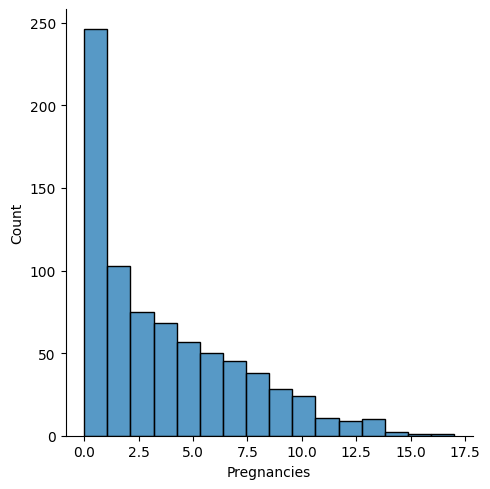

In [16]:
sns.displot(df["Pregnancies"])
plt.show()

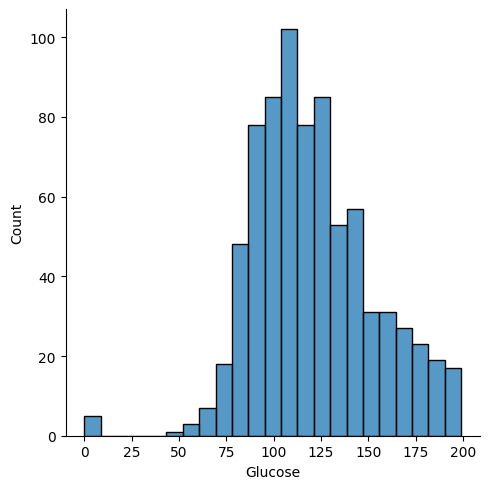

In [18]:
sns.displot(df["Glucose"])
plt.show()

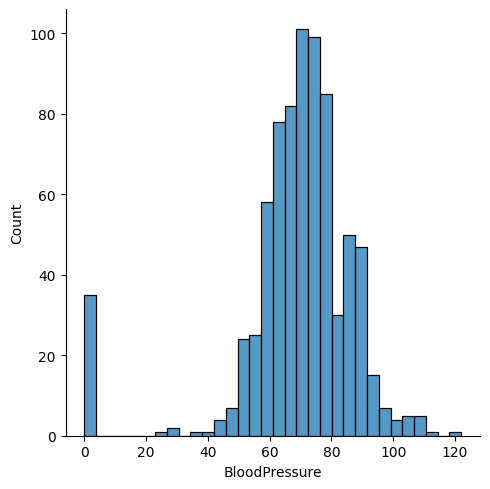

In [19]:
sns.displot(df["BloodPressure"])
plt.show()

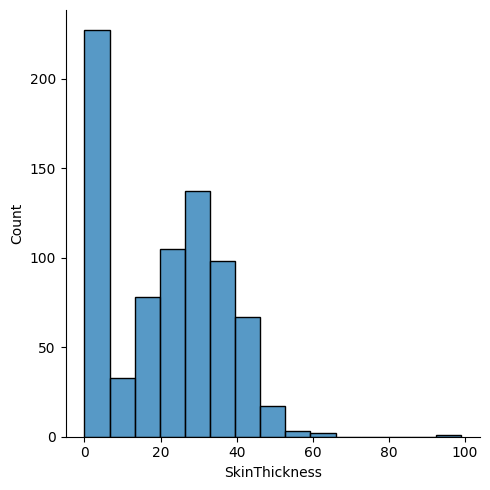

In [20]:
sns.displot(df["SkinThickness"])
plt.show()

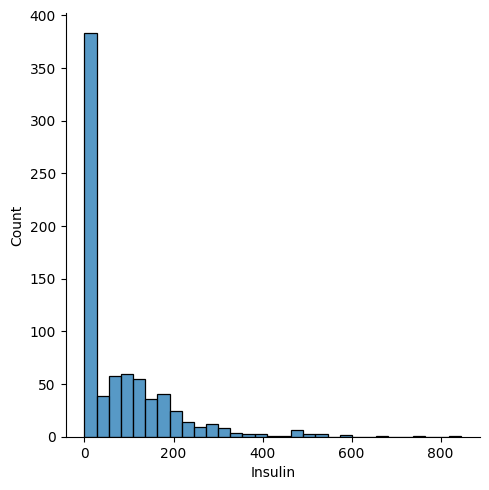

In [21]:
sns.displot(df["Insulin"])
plt.show()

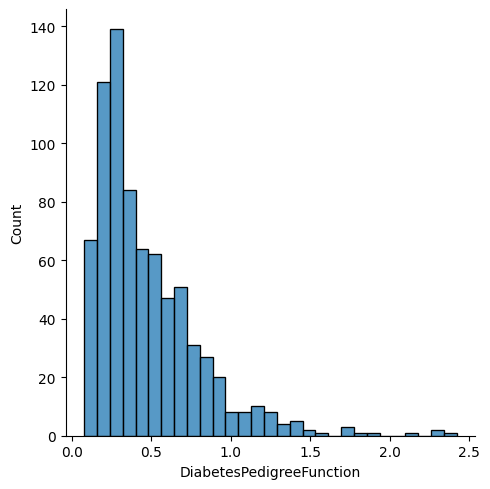

In [24]:
sns.displot(df["DiabetesPedigreeFunction"])
plt.show()


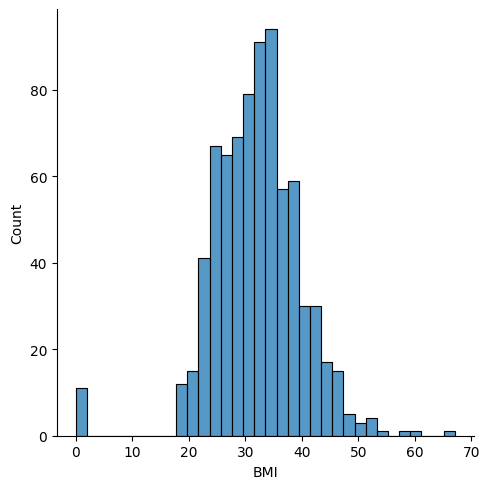

In [26]:
sns.displot(df["BMI"])
plt.show()


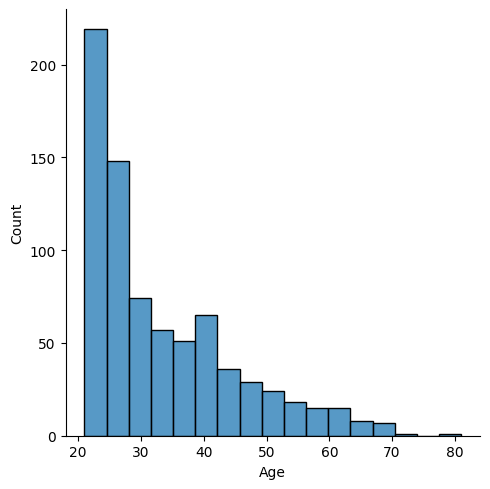

In [22]:
sns.displot(df["Age"])
plt.show()
    

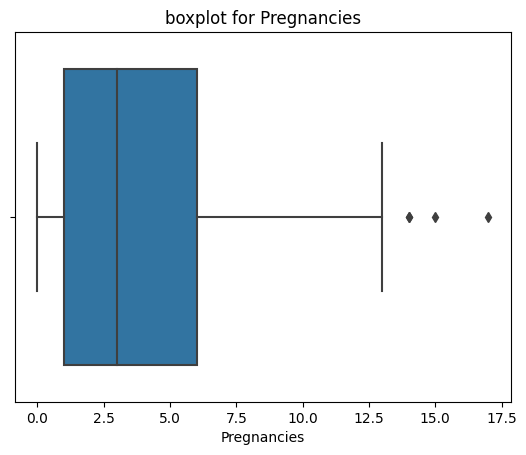

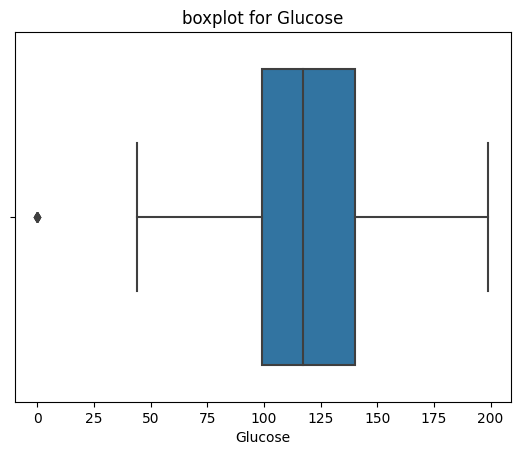

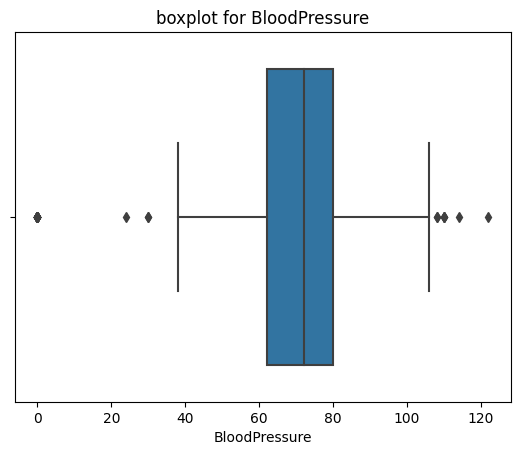

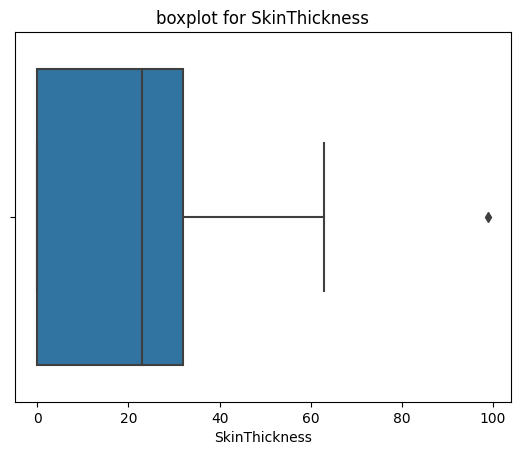

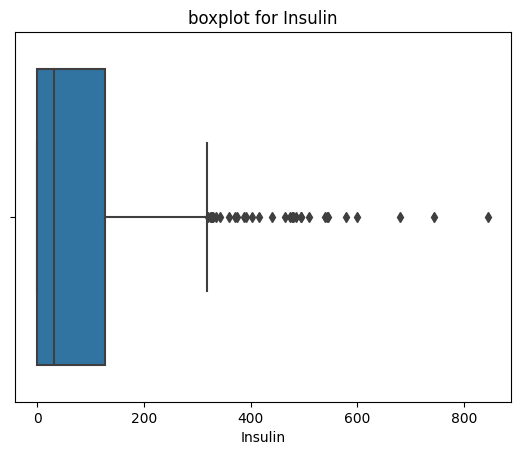

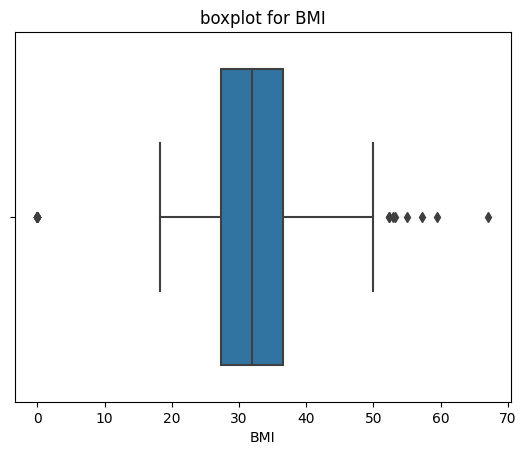

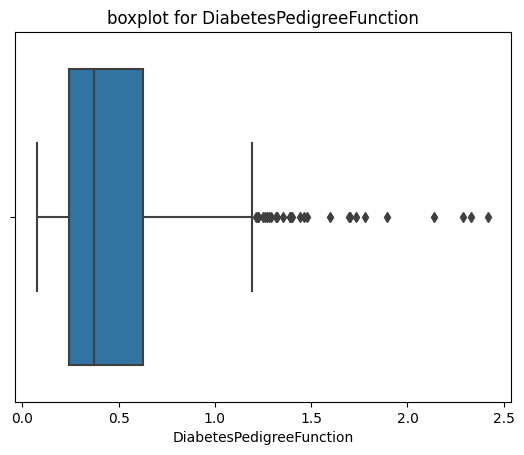

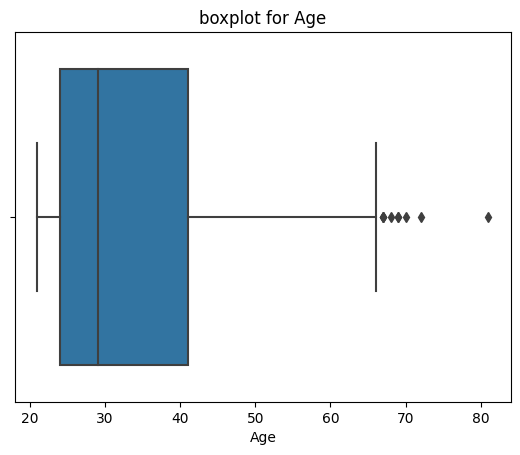

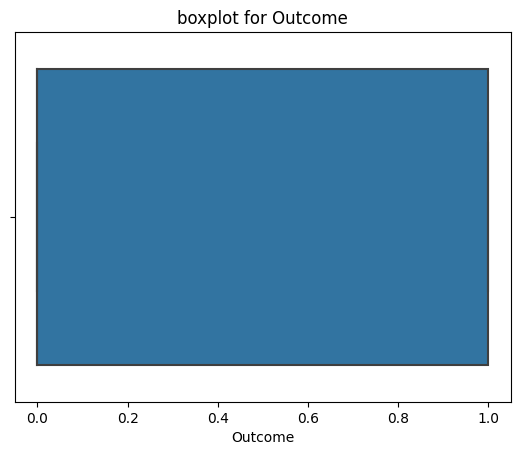

In [30]:
num_col=df.select_dtypes(include=["int64","float64"]).columns
for col in num_col:
    sns.boxplot(x=df[col])
    plt.title(f"boxplot for {col}")
    plt.show()

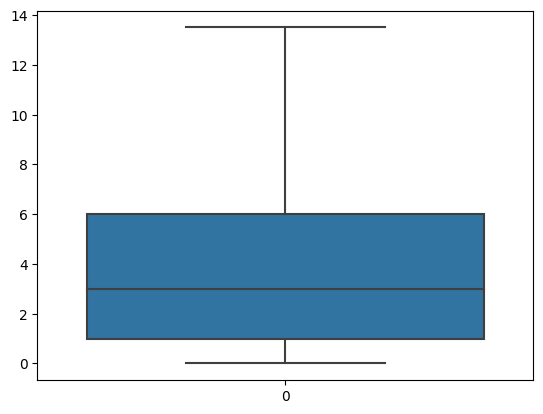

In [32]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["Pregnancies"],tail="both")
df["Pregnancies"]=winsor.fit_transform(df[["Pregnancies"]])
sns.boxplot(df["Pregnancies"])
plt.show()

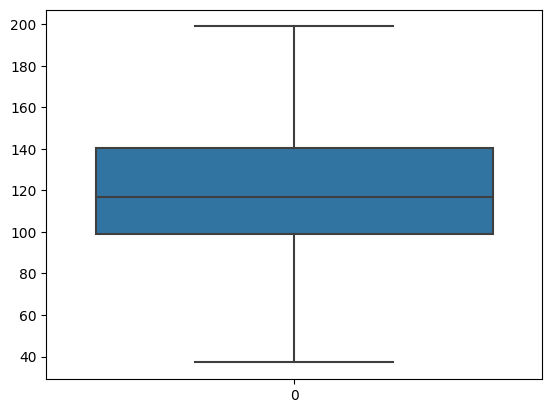

In [33]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["Glucose"],tail="both")
df["Glucose"]=winsor.fit_transform(df[["Glucose"]])
sns.boxplot(df["Glucose"])
plt.show()

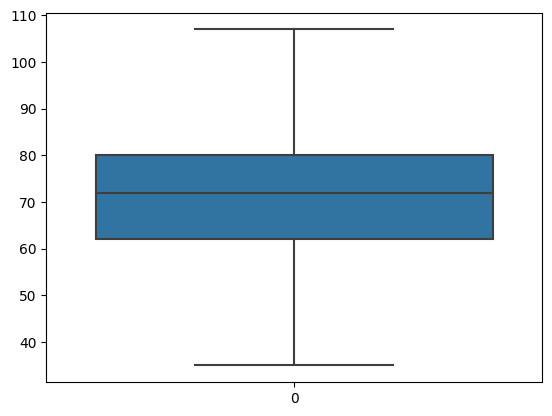

In [34]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["BloodPressure"],tail="both")
df["BloodPressure"]=winsor.fit_transform(df[["BloodPressure"]])
sns.boxplot(df["BloodPressure"])
plt.show()

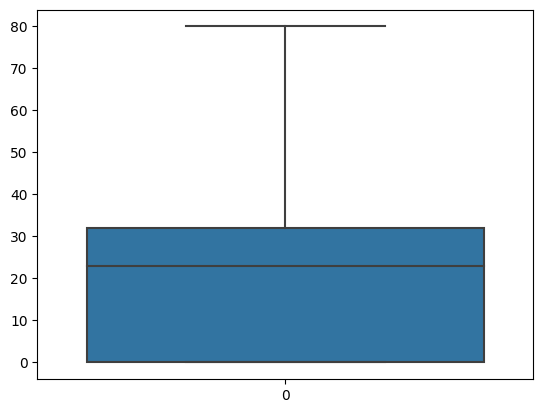

In [35]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["SkinThickness"],tail="both")
df["SkinThickness"]=winsor.fit_transform(df[["SkinThickness"]])
sns.boxplot(df["SkinThickness"])
plt.show()

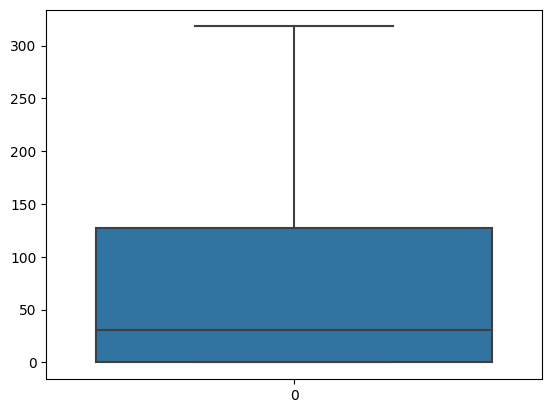

In [36]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["Insulin"],tail="both")
df["Insulin"]=winsor.fit_transform(df[["Insulin"]])
sns.boxplot(df["Insulin"])
plt.show()

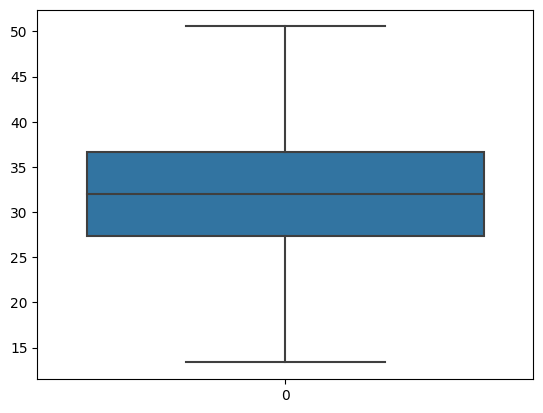

In [37]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["BMI"],tail="both")
df["BMI"]=winsor.fit_transform(df[["BMI"]])
sns.boxplot(df["BMI"])
plt.show()

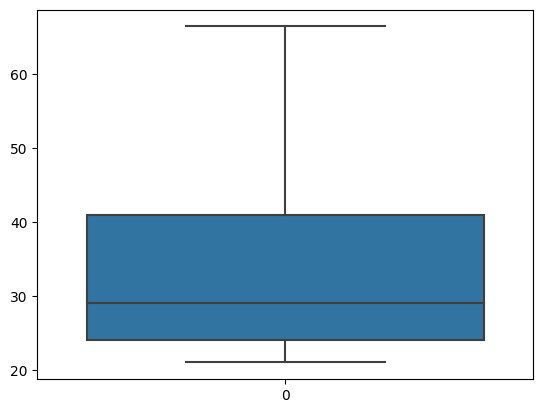

In [39]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["Age"],tail="both")
df["Age"]=winsor.fit_transform(df[["Age"]])
sns.boxplot(df["Age"])
plt.show()

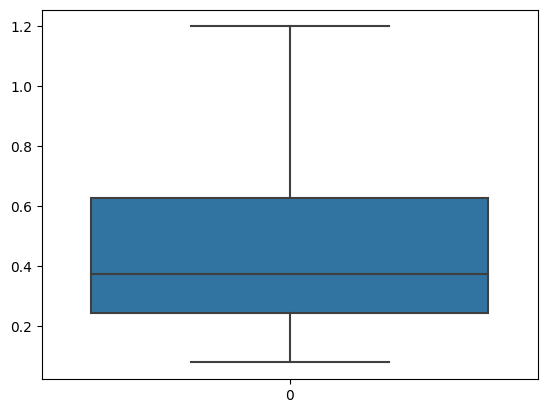

In [38]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["DiabetesPedigreeFunction"],tail="both")
df["DiabetesPedigreeFunction"]=winsor.fit_transform(df[["DiabetesPedigreeFunction"]])
sns.boxplot(df["DiabetesPedigreeFunction"])
plt.show()

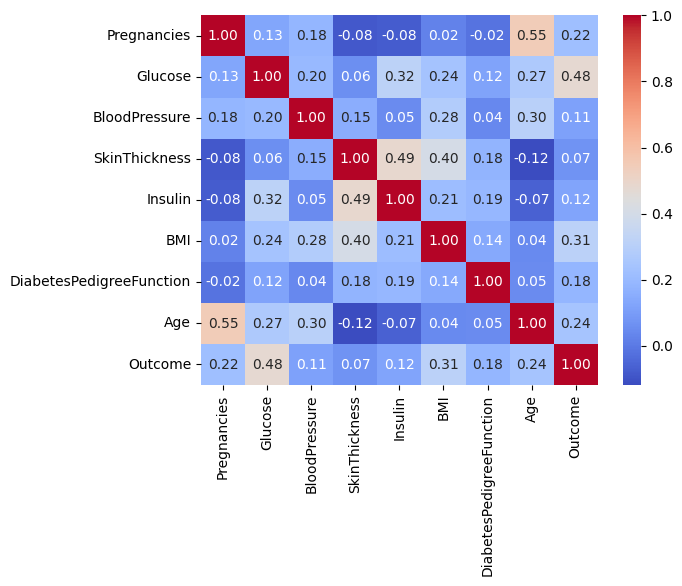

In [40]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

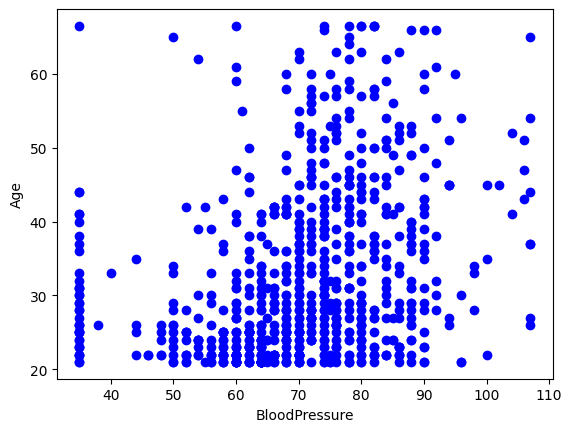

In [41]:
plt.scatter(df["BloodPressure"],df["Age"],color="blue")
plt.xlabel("BloodPressure")
plt.ylabel("Age")
plt.show()

In [42]:
Bins=[0,5,10,15,20]
label=["low","avg","good","excellent"]
df["BloodPressure"]=pd.cut(df["BloodPressure"],Bins,labels=label)

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,NaN,35,0.0,33.6,0.627,50.0,1
1,1.0,85.0,NaN,29,0.0,26.6,0.351,31.0,0
2,8.0,183.0,NaN,0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,NaN,23,94.0,28.1,0.167,21.0,0
4,0.0,137.0,NaN,35,168.0,43.1,1.200,33.0,1


In [45]:
df.BloodPressure.value_counts()

BloodPressure
low          0
avg          0
good         0
excellent    0
Name: count, dtype: int64

In [51]:
le=LabelEncoder()
df["Pregnancies"]=le.fit_transform(df["Pregnancies"])
df["DiabetesPedigreeFunction"]=le.fit_transform(df["DiabetesPedigreeFunction"])
df["BloodPressure"]=le.fit_transform(df["BloodPressure"])
df["SkinThickness"]=le.fit_transform(df["SkinThickness"])
df["Glucose"]=le.fit_transform(df["Glucose"])
df["Outcome"]=le.fit_transform(df["Outcome"])

In [52]:
x=df.drop(["Outcome"],axis=1)
y=df["Outcome"]

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [54]:
model=RF()

In [55]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [57]:
cm=confusion_matrix(y_test,y_pred)

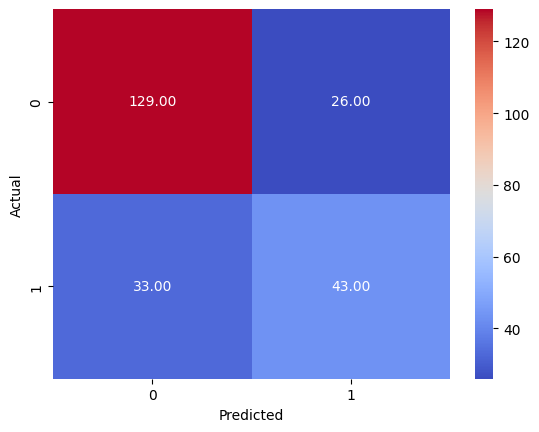

In [58]:
sns.heatmap(cm,annot=True,cmap="coolwarm",fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [59]:
acc=accuracy_score(y_test,y_pred)
acc

0.7445887445887446